In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.column_transposition import *
from cipher.vigenere import *
from support.text_prettify import *
from support.utilities import *
from support.plot_frequency_histogram import *
import re

In [3]:
challenge_number = 8
plaintext_a_filename = f'{challenge_number}a.plaintext'
plaintext_b_filename = f'{challenge_number}b.plaintext'
ciphertext_a_filename = f'{challenge_number}a.ciphertext'
ciphertext_b_filename = f'{challenge_number}b.ciphertext'

In [4]:
ca = open(ciphertext_a_filename).read()
cb = open(ciphertext_b_filename).read()

rwa = wcat(cat(reversed(w)) for w in ca.split())
ra = cat(reversed(ca))
sca = sanitise(ca)
rsca = cat(reversed(sca))
pca = letters(ca)
pta = depunctuate(ca)

scb = sanitise(cb)
pcb = letters(cb)
rscb = cat(reversed(scb))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


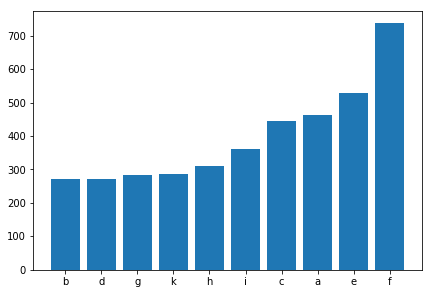

In [5]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

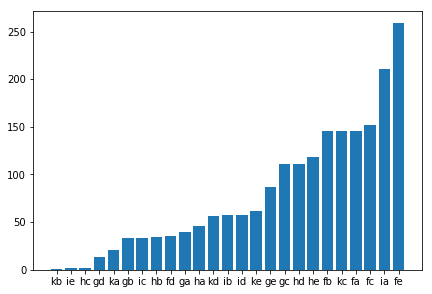

In [17]:
fc = collections.Counter(chunks(scb, 2))
plot_frequency_histogram(fc, sort_key=fc.get)

In [26]:
p_common = [p[0] for p in collections.Counter(chunks(scb, 2)).most_common()]
e_common = [p[0] for p in english_counts.most_common()]
bsubs = {p: c for p, c in zip(p_common, e_common)}
bsubs

{'fe': 'e',
 'ia': 't',
 'fc': 'o',
 'fb': 'a',
 'kc': 'i',
 'fa': 'n',
 'he': 'h',
 'gc': 's',
 'hd': 'r',
 'ge': 'd',
 'ke': 'l',
 'ib': 'u',
 'id': 'm',
 'kd': 'w',
 'ha': 'y',
 'ga': 'c',
 'fd': 'f',
 'hb': 'g',
 'gb': 'p',
 'ic': 'b',
 'ka': 'v',
 'gd': 'k',
 'ie': 'x',
 'hc': 'j',
 'kb': 'q'}

In [28]:
comcb = cat(bsubs[p] for p in chunks(scb, 2))
comcb

'actseleitsocourhonankoreitiupstyeinvtsanpatahtsitoureccorthtowontiantsehobaethfvgroxvmirhahlooyelihyvdoitsanpoctsehobaeteygaremihhtokelfvsahleitstseuhhrceelhontseinpertsitmehtarugmatseiwsmirmecapstanathguggethtitehmesibetraeltowontianatfutanomreidahetsitmewinondvleceitattsemivmecoupstcihwahyfvtikanponathyapstanogenmirourgodatawainhsibehsrunkcroytsewoncdawtinltsevneelireihontowoncronttseebadebentsetsreitocnuwdeiryahhadehfihelanwufilalnotpabetseytseyettdetocapstanhteiltsevsibewonbanweltseyhedbehtsittseyillowtraneocyutuiddvihhurellehtruwtaonmaddgrotewtuhinltsitgeiwewinfeyiantianelunlertsehsedteroctsenuwdeiruyfredditsevlonotheeytoheetsittsedonpermewomerantsahhsilomtseyoretsetmohalehmaddanbehtantseheimcudmeigonhfecoredonpatmaddfeaygohhafdetocapstitiddmatsouttsetsreitoctotidinnasaditaoninlmsentsitlivwoyehmemaddiddfeenhdibelfvmsoeberahyorerutsdehhdoheinlmemaddfetsehdibehtsegraweocmannanpyapstfemorheitcarhtasogeltsittsehgiweriwemoudlsedguhturnanptseyahhadehcroymeigonhocmirtowirraerhocgeiweinl

In [29]:
kb, scoreb = simulated_annealing_break(comcb, fitness=Ptrigrams)
kb, scoreb

('ifwlecpsazkdynogjrhtubmxvq', -6624.359993210847)

In [32]:
pb = keyword_decipher(comcb, kb, KeywordWrapAlphabet.from_last)
pb

'ifthedeathofoursoninkoreataughtmeanythingitisthatoureffortstocontainthesovietsbyproxywarsisdoomedasmyloathingofthesovietempirewasstokedbyhisdeaththeussrfeedsontheangerthatwestirupwitheachwarwefightinitspuppetstateswehavetriedtocontainitbutinowrealisethatwecanonlydefeatitthewaywefoughtfascismbytakingonitsmightinopenwarourpoliticianshaveshrunkfromtheconflictandtheyneedareasontoconfronttheevileventhethreatofnuclearmissilesbasedincubadidnotgivethemthemettletofightinsteadtheyhaveconvincedthemselvesthatthemaddoctrineofmutuallyassureddestructionwillprotectusandthatpeacecanbemaintainedundertheshelterofthenuclearumbrellatheydonotseemtoseethatthelongerwecowerinthisshadowthemorethetwosideswillinvestintheseawfulweaponsbeforelongitwillbeimpossibletofightatallwithoutthethreatoftotalannihilationandwhenthatdaycomeswewillallbeenslavedbywhoeverismoreruthlessloseandwewillbetheslavesthepriceofwinningmightbeworseatfirstihopedthatthespaceracewouldhelpusturningthemissilesfromweaponsofwartocarriersofpeaceand

In [ ]:
print(lcat(tpack(segment(pb))))

In [15]:
db = [9 if c == 'k' else pos(c) for c in scb]
db[:12], scb[:12]

([5, 1, 6, 0, 8, 0, 6, 2, 5, 4, 9, 4], 'fbgaiagcfeke')

In [16]:
db = [pos(c) + 1 for c in scb]
db[:12], scb[:12]

([6, 2, 7, 1, 9, 1, 7, 3, 6, 5, 11, 5], 'fbgaiagcfeke')

In [12]:
len(scb)

3958

In [13]:
gpb = open('8b.given.plaintext').read()
len(gpb)

1980

In [14]:
len(scb) / len(gpb)

1.998989898989899

In [34]:
k_b, score_b = vigenere_frequency_break(rscb, fitness=Ptrigrams)
print(k_b, '\n')
pb = vigenere_decipher(rscb, k_b)
pb

uobonssahasosonncsm 



'gnjfkrwbuvtjrozolhaquxrcbuswhcbadmblzkgceakhrtrpgjraehcmmloqrrclqgbyemeuamqhlsptcgldmgjnxrbywtolholuiemttyteeaaobdfsnbhhnayydlhgnpanykrropibfywemsuhlwcgitiwpwtuhgcocwouxkqkipztlaqeauriqhtaekssfjgokbcthevolgnhdcewhzxywvmihnljtaielykslrbxrtozeidxcuvmtadfhimrhrxyyxosphgeokbsmqcxvtsjntcitohioxtuakpbqotpteegrmddgmxwtncovryguairzciaacrtmnpwricwbubkdcwcknvgofbizlmomlipnisvetvokddqsctcakficaenovanoryazwajmmuqmnulhmozpkbwzjryknhkkvtyuwwkninmknlfhugubugdkyhshychglvhdcfdpfdmycnubstchfmdtgosvhcsmupamtyigddaukaenaxgnpwfwvcckjnwnzfyvtjexuignsmwyysmvunamtuzcemaxashmauzvrryjtaotqlcfaflymnwzuhcsttetcnndhligpfccxrtudmjjgfgmapyttfkezdcbnuhkqtrbiorlkplajadnfyiuyholbssjknshskdjumirmosyykaletnlmdajlxnptowuohhkuwukohkmxmfupyrzcwkacdegxmouwgciwgnoebrjwtongivyesgupsvoyrgyesehzclfnwykuzpllihllrlelmkexfomxtbfgpoccuwygjoqlddbeookwnbkummtghgsraxbiefuldqfxuzazzrystngupakskecuydeonaowjoslnfgaylvewhzavcvhwffoxzutyrjcofhasysuqwhxaohrxgtciiuysbustveprwprmestwysuwgdtuyfhrmsfdnxcucbjoiowfvpdrkshlullmghgupusjqhcornakbdpm

In [30]:
rlcb = cat(cat(reversed(l)) for l in cb.split())
rlcb

'NTNQVATAVHRAYMFTPAVRIAGFYETSWGUYGDASHLHGOAASNBJGTUTCUNVPFGZNEIZQVFBNCPXDYFEESZAQUANLQCDOAUFADOPHAGEDNVLGHTAWWLEKLTFBYTOSAMOITEVXAWMGCPXLGEHGCLPYVBGKTQGONEDGMZHHRVDIJOYGUCFWHYFCDELBLGGTQLOLWNJFQEBHOEYFZSYFKUSESUUKCIKGLQVLPGBYBAOEQOFVAYKWFWHWGRWMVUYGSZLGORKODQSLNOTUGCHNVHPGUNBQDQLCXVGAXFGBBVVPEWWCGTEELUNRJGUKWURYEPFVUGPZTFICRJFUVGHOFJEUEXWNGDZZWLGJSALSCNOVZJBBZFCEZOINKSXPSUPQVSBNBUZCFWWJJQGVMVWNTTTZYOYFNMQAHINCDPLVULRCDSBVCGKDZGMXBPTDLZYPQYNWMMTGCOHCSHMSIUHSFKLHHSXRPEPZZZIQWYSMUXBJLMCSARVTESGLNQDMKSYAVEAAGPRKCGJBNMTGWZEHYRVTQFSWTUDETHHBPNUEYNXCDNTIBHPXQLQNEKZTMEFYFCZQKVHAGLWSOHOQSSSRURGPOGTMEALQLQCFQVEAUNVOQPMHYZQVTQUHNBKYFMWYGPTZVHHBTSAAHFFQPWHVOVPSNFGFHYCPFLOMRGZFXBIFVWIGUAFDZAFSYAVSXDZBRQLBFUNRMVPASQUUQVBJODNJDFGWCBUCGMINIVLPOGYLKOQAYPJVEFDKOCJDPRWPYYVYGUONUWSZJOSRTETWOHVCDRLUGUFPQWVBUKPRILOWRYPMSCXZMCFWBUTFMMKJCRTNYWGYNJSQSWHOKPQSSUYVJXQOOGQEXFHGXUTOHOCIOUTFMHNVFZZUSNGUOFWFCJVGDUDOUAGJAASYUKPQWHFRKFFGWPUUSIYRHGVCFGPHBGODSOYRANENLBZEOEUSBCITSULHNNWEQATYVCFQLHYJNPFSBMNTWUYNZQHTBAWJIJV

In [35]:
k_b, score_b = vigenere_frequency_break(rlcb, fitness=Ptrigrams)
print(k_b, '\n')
pb = vigenere_decipher(rlcb, k_b)
pb

auaasnonhcncipbobsny 



'NZNQDNFNOFEYQXEFOIITIGGFGRFFPEHWYOZEGTUIOGASVOVTMSGAMYUBEOMPEOZQDSNAVNKBQQDQRHNSUGNLYPPBTSSYVZOTZORFNBLGPGMJPJRIDEENXBBUASOIBRHKTUZEUAWXFMUICRPYDOSXMOTMFPCSLHUJRBDIRBKTNASUZJEOCMYDLMGTYYAYPLWDIPATNMLHZYYFSHERLSHIUTJSKYINPMBYJNARJMSTSJJIEEUYGXWMDHKTLXYEGCJACYFNNUTUOPTAOFCEMYACCYYEXBGAFSSOUTINWHVOFBRGLANRRTGXPSEWWAEHTOCBTLICZWRHOEUMXUDGDFJPGJZZEYSWLYYQUYNHYRODZLCEHBUADQKNKFOCUAOPBAZCNJIWCOTTEGVZSBGBYUYFVZCNAGAAVAKHTTEEDYBVKTWQSEZVTASPKHLRQENWUZFTVMUAKSLEHCUUFQLHPFJEICCXRKHCVGFOUDBJTZOFTPIRWDFXMYQOKYYADRMNZNEIURINMUGIWFEHGEHGJDFULFCQSPUDPTUEGAJPWLGGTSOJPTDPEQZTURRLYAMOCGGMFTJUONOQAFEENPTNGRSYDIYSLWCFYIQNNLIMIALTXHDXTWUHVOWLYKJWYASLUPUDTYAAPSRDIUUTGGOEMNTHHECPNYAZKEMDPMHRUEVIUGFDHNRFRYIQPOYNQYYDFANRUIBNLOHSIGAVNLALDLGWKOGPZKVLAGKBNOLNKUQAGCVIXDQIGNIPOZJRYEVYOHAANUFXBZRDSMGYONVCLEXHZSSNIHUNTSCTIROWZLBZLAKXENEIACGHMSKJKEFARUTWFURCREUQKVQSAHKICVDMGRPQWNUIXATOPBOVHSGDESMHEHMWSTGUWSISVHIEVFCATITLAGSYCXBDPFSPCQESVXHWSOYRPTHPYECFTRNPRWLTATENTOLRHCHQTNHFRCYJNTWEYNFLOASODSXVMXSUBSNTEHKASOURTLVVHRI

In [36]:
k_b, score_b = vigenere_keyword_break(scb, fitness=Ptrigrams)
print(k_b, '\n')
pb = vigenere_decipher(scb, k_b)
pb

sonyas 



'rnauaiwsunhaiptauoeeggynomvtvixfsoyiztictidcavnwlmswawlodnniccnbsmmrlfxxkzohvyhurpzonbipukbggicopqtnxxkszyafdqgkouiebvyjnfymeteinvhothafeoitcnotyftiljtqqefgpiseuogawkddztubmolqaqgybwtdvgxxxaadnadgoijkoiptdcyikqkwhwsmagxhyahrlgopjqdhjvehkelylcopuoxtiphkoggqntacqqkzwsybsoggiowzoiuyfedgslrkqrgbpochsregzgjmuordawlmmftewembixbjorkcgyxgfrxaszvqzmkrmdbrhhbpcatmflgtelmfgvejrwernauibaloenudtbqenqpmdonngalbtbbzjxmdocwlwenomwbvjeigpzfeujlsneuwiautfehwksgomevkdryhtpgrbfusmfkokhadjokwergiiqicyasyqsntoervvziepolrjjhosgecvbzhxfmmevyxdzppjugpdkfzlguvxnujtmlggysnyfitypmljitudzhcedyrpslytmrotowbttuzaefsopwejngiphxszknksgmnvecxodpicsfnpmnutjptibtxokjofgsnajuybhdbypubdqmzvgsdlyznmfxadmlufihpscuoqiihijfrmiruwxsrcgprtmdnmhwryiyaxnyowbyxivqyteujkithdrvpblbdyghssixhcmujdidrfcogytdkdtbytmbdfqjhaihpocokiayxedcfjkwgfuqxsauysyavaagegzgtcrsyzhtcjisemhfofopgzibnizlsilcnerbwgvagmbfdvtzhtcwupqhwbgkihnfqdiowyjwxyzgaffoojtcifkdsutyqaghrwonrxtfpeccmugamnlgicaqwycefaobanbalyptcsevgbmdgwvvtywsbqoouumwqmdlvmznsgqkxordmgof

In [39]:
k_b, score_b = vigenere_keyword_break(rscb, fitness=Ptrigrams)
print(k_b, '\n')
pb = vigenere_decipher(rscb, k_b)
pb

zns 



'bosukrpojwyfkpucahnxqzsxuzaeucqfzabvsjirswymrulxzkrpecfrggpzgrcedvcdaffpobqusoruxzqlutjccnpygmnnwchinennbruetavrgxatwqhhgnnzihahidpnlrntpkbgngjebxqvlgvfkiwsdbtvbovpclopapkfjyotltdtbznbrchpexzohkbhpjkghtakzgxacetkdncyxpubinajodnygzthlrukgutvxjylruitpceaanuzurmdulocigitcgpxmrwfousynofnnjirdxtnnzqgmhukhtetyifebfcebacdanmgethtoqeofcsnugqwgixzgowlmrwcdakhtbujuzbozserodlambiozizesmmbczteqfeoidtoogyvcbuenvjqmghairksqfplzwyumocdpdblulbgbixfjpatdilucoowlywscbhbbmewdcyqegiirdiiqsgjdhnymlwaihrxiipkfsaxuzrfulumgbxvnkzkqqdlzjnpaogdrmkzljituooxtrxudhnprpizmxlcmoovravtdksyytvrykgdopflrzcxeqadnhiegjjpecenoxscrcnhunfilvtcafpznbyleodxesoclzirbbbgmplebeosnsfewzchqjafjzsovsuwiwbwnatszsstmeingpiuemgcpthjjpmddvrizouriznanugzmclpwqdozwodisuhixavhfbgjrwthbjeneszhetakrsbmtsrovemagbgshzeqhwhveqntziyjxgiuqubugkrhwpxhvjojysegahpfkcbxbioubalaznxqnatuvwphmivoezssamogjpvnxezddndehappbfhtgbugnfhxfraeidpvwbbtohstvnffqtfiuartufwcaficsgvtcbvjzxxntojtpedltnzlyegfullzhuiygtbgbrsxdokukoxoriajysthhlnyanldzvkihjdoyqsitpjlcm

In [42]:
k_b, score_b = vigenere_keyword_break(sanitise(rlcb), fitness=Ptrigrams)
print(k_b, '\n')
pb = vigenere_decipher(rlcb, k_b)
pb

noshs 



'AFVJDNFIOPEMGFNGBIOZVMOYGRFAPOHKOWIFTTAOBMILVOVOMCGOCGDCROSVRUHJDSNVVXKPGYMREHTYHMVEYPPWTCSMLHXUMOXLAHTZPGMEPTRWTMNOKBHANYWBBRHFTEZSKIFYSMAOPXXRDOSSMYTAVXLTYHAPEHLBRBKONKSIPRNPPMEJYSOMYYATPVWRYXJUAMRNMEGYSHEMLCHWKBSTXYOTCSJRJNAMJWSHIRSJREAETDEFDHKOLHYSWKSBPYLTAABNOPTVOPCSCGJDPYEKKHOTFSSJUDIBMPEPSBXMYGVKRTGSPCEKMINIGOIHGRQVZWRCOOUANCMHQFPVTPHSEYSRLIYEKGWILRUJMRKXHBUVDAKBANXDHAUVOGHVNJIRCYTHUOEAFBMHLAGYVZCIAQAOLITIGTKKQEJOKTWLSOZJJIBQXHRXDKVPUZFOVWUOAAUFUCAASWTAPFJZIMCLHSQDIGLUHJJCTZOATZIFMLOYZYWUXEGTDRMIZXEWKZROZUMOJLMAGEHBJNFIBNLRFPAJCZCXGAJKWVGUJAXKCTJVRWHMURRGYKMCSOPNSTPABTWJAFEZNZTBWZBZQIEYYCKYYIQINVIAYIUUKHJDGCCAVOWGYUJKOIBMHPAJGEITPSRYIEUHWOXFZNZNUKKINYAUKOMRFUQSHEBOHMNWHNRARIIEFWHODYEJSGVKUIBILYHGYOJWALGRQROPKOGKZUVZQOTCAORTXAYTGCVDXNQWWVRQBZPXLKDROHAVNEFLRHAEFMMEBTDVLEXCZCSBYPDOGSIZVXWPZLBULKKLUVNJNCMNZYSCKEFVRETKVCADEEAWXBYLAHKDCFDAWZYRJNAOKGBHPBOQHCGRUAVIRHSCFZONWSINVRISLNLBGIZRNMARCXBYPPSDSYNTIXNCFUGKPTHKYOCTJZWQEWRZNZMGTOLMHMHEJVQGECEPAZEXYNFGOKSCTAGWZXYAOYVMEHKVSYUFJTEWURO

In [46]:
cb.split()

['JBNSAAOGHLHSADGYUGWSTEYFGAIRVAPTFMYARHVATAVQNTN',
 'ODAFUAODCQLNAUQAZSEEFYDXPCNBFVQZIENZGFPVNUCTUTG',
 'CGHEGLXPCGMWAXVETIOMASOTYBFTLKELWWATHGLVNDEGAHP',
 'LOLQTGGLBLEDCFYHWFCUGYOJIDVRHHZMGDENOGQTKGBVYPL',
 'KYAVFOQEOABYBGPLVQLGKICKUUSESUKFYSZFYEOHBEQFJNW',
 'VXCLQDQBNUGPHVNHCGUTONLSQDOKROGLZSGYUVMWRGWHWFW',
 'VUFJRCIFTZPGUVFPEYRUWKUGJRNULEETGCWWEPVVBBGFXAG',
 'QPUSPXSKNIOZECFZBBJZVONCSLASJGLWZZDGNWXEUEJFOHG',
 'BSDCRLUVLPDCNIHAQMNFYOYZTTTNWVMVGQJJWWFCZUBNBSV',
 'EPRXSHHLKFSHUISMHSCHOCGTMMWNYQPYZLDTPBXMGZDKGCV',
 'NBJGCKRPGAAEVAYSKMDQNLGSETVRASCMLJBXUMSYWQIZZZP',
 'TZKENQLQXPHBITNDCXNYEUNPBHHTEDUTWSFQTVRYHEZWGTM',
 'VNUAEVQFCQLQLAEMTGOPGRURSSSQOHOSWLGAHVKQZCFYFEM',
 'FNSPVOVHWPQFFHAASTBHHVZTPGYWMFYKBNHUQTVQZYHMPQO',
 'MRNUFBLQRBZDXSVAYSFAZDFAUGIWVFIBXFZGRMOLFPCYHFG',
 'KDFEVJPYAQOKLYGOPLVINIMGCUBCWGFDJNDOJBVQUUQSAPV',
 'PKUBVWQPFUGULRDCVHOWTETRSOJZSWUNOUGYVYYPWRPDJCO',
 'USSQPKOHWSQSJNYGWYNTRCJKMMFTUBWFCMZXCSMPYRWOLIR',
 'DGVJCFWFOUGNSUZZFVNHMFTUOICOHOTUXGHFXEQGOOQXJVY',
 'RYOSDOGBHP

In [47]:
tcb = sanitise(cat(cat(col) for col in zip(*cb.split())))
tcb

'joclkvvqbentvfmkpudryqwyafbfgsonaygqyqudsgtcflybdgoyxupspbznnrdksgyugzcgeuwrfosebufdqbrnajgtytnahlacfudrjkusnfusvowifbxuhlzruwtsdjqalvwxyualjsfeqvljscxgeapuebqjstccqaeckbrqugzvvpvmydkgecozaugtfqrprscnevfvvpcdnlqatwirsrcymbegiflgnhlacfxaalgodcxlhkqvobjwkfombrdnwyatntkhdfuxwvvlnmfspoooxgqqisuhrlqvlpqowgbpxgpsvsontrjghsydrauxfmfbfgdplebfkvlpqfhqyphfbsdcfnmydvvtmiugecxyesjqaebqhccbontnlkgxcwrafwohfewcztmqnlhwcmfuauonwqalkgalqglauzipfapqpbqusuppyzuwtsdczpwvvpguqxktecqftwhlmebgpodsahlqzogqggnczeahlhccmazwqbpvdvlkgscdrsnwdypgzchebqfdkusnfjspuebmgavvzosulowrbfowdcdnaaacbhuenuvilfxlljscyyasphdirnfgbrfufzcqnyzgayoduxfgvvciiatahsyrnuvhsufuaugzhpvwfwyeaewcpfnupzgqvypnffhsyneavgdyzgltczjeggjswjgfgwhthfusvqzhryaehlhpzamsdmaaocgzhqbxvvplmssxwlnaekusynaawzqsuztwvcebqhkctsypvwfrfluaycfpwaafcwdmmaugatmevgpgsifqgybmsmxgtslhyvycbontrxkzpmtbouhsufowhccyfuweoclurjncdnobfvonnivljvtmbyspssydrhqfeypuwcfthsemugtuzfhqyphaiwthsydnvkcnbmafgzdoervdmebqzaidtfagkowvyoneghzntrmutzlfuwhiyydndcbohqiwtkphfoseysyinkooclu

In [48]:
k_b, score_b = vigenere_keyword_break(tcb, fitness=Ptrigrams)
print(k_b, '\n')
pb = vigenere_decipher(tcb, k_b)
pb

columns 



'harryidontthinkwearegoingtoneedtolookfarforourmoleandicannotbelieveithastakenmethislongtoworkitoutyouarerightthatalotofstaffherespenttimeintheukeitherduringthewarorworkingwiththeballisticmissileexpertsintheiratomicweaponsprogrambutyoudonteasilypickupweirdspellinghabitslikethatasanadultyouhavetohavebeeneducatedtherethereisjustonepersonihavespokentoaboutallthiswhocomesfromtheukandthatismikeididntrealiseatfirsthisaccentisprettygoodsincehehasbeenheresincethemidfiftiesbutassoonasyoutoldmetolookoutforsomeonebritishirealisedthattheslighttwangthatithoughtmightbebostonianwasactuallytheremnantsofanenglishaccentiwasalsothrownbythefactthathissondiedinkoreabuticheckedandthebritssenttroopstohelpusoutinthatconflictandmikessonwasoneoftherafaviatorssentonexchangetotheusafhediedduringareconnaissancemissionshotdownbyakoreanmigandthefileshowsthatbeforethecarrierlostcontactwithhisplanehereportedhearingrussianspokenovertheradiochannelsusedbythemigpilotsmikecametotheusforthefuneralandneverwentbackhewasmarri

In [49]:
k_b, score_b = vigenere_frequency_break(tcb, fitness=Ptrigrams)
print(k_b, '\n')
pb = vigenere_decipher(tcb, k_b)
pb

columns 



'harryidontthinkwearegoingtoneedtolookfarforourmoleandicannotbelieveithastakenmethislongtoworkitoutyouarerightthatalotofstaffherespenttimeintheukeitherduringthewarorworkingwiththeballisticmissileexpertsintheiratomicweaponsprogrambutyoudonteasilypickupweirdspellinghabitslikethatasanadultyouhavetohavebeeneducatedtherethereisjustonepersonihavespokentoaboutallthiswhocomesfromtheukandthatismikeididntrealiseatfirsthisaccentisprettygoodsincehehasbeenheresincethemidfiftiesbutassoonasyoutoldmetolookoutforsomeonebritishirealisedthattheslighttwangthatithoughtmightbebostonianwasactuallytheremnantsofanenglishaccentiwasalsothrownbythefactthathissondiedinkoreabuticheckedandthebritssenttroopstohelpusoutinthatconflictandmikessonwasoneoftherafaviatorssentonexchangetotheusafhediedduringareconnaissancemissionshotdownbyakoreanmigandthefileshowsthatbeforethecarrierlostcontactwithhisplanehereportedhearingrussianspokenovertheradiochannelsusedbythemigpilotsmikecametotheusforthefuneralandneverwentbackhewasmarri

In [50]:
print(lcat(tpack(segment(pb))))

harry i dont think we are going to need to look far for our mole and i can not believe it has taken
me this long to work it out you are right that alot of staff here spent time in the uk either during
the war or working with the ballistic missile experts in their atomic weapons program but you dont
easily pickup weird spelling habits like that as an adult you have to have been educated there there
is just one person i have spoken to about all this who comes from the uk and that is mike i didnt
realise at first his accent is pretty good since he has been here since the mid fifties but as soon
as you told me to lookout for someone british i realised that the slight twang that i thought might
be bostonian was actually the remnants of an english accent i was also thrown by the fact that his
son died in korea but i checked and the brits sent troops to help us out in that conflict and mikes
son was one of the raf aviators sent on exchange to the usaf he died during a reconnaissance mission
s

In [51]:
open(plaintext_b_filename, 'w').write(lcat(tpack(segment(pb))))

2749